# Importação das bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn import metrics
from sklearn.metrics import accuracy_score

## Iniciando a análise exploratória do dataset:

In [5]:
arquivo = 'diabetes.csv'

diabetes = pd.read_csv(arquivo)

#Para exibir as 5 primeiras linhas do df - se não tiver argumento:
diabetes.head(10).T

,0,1,2,3,4,5,6,7,8,9
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Considerando que nenhum dos registros possui dados nulos, faremos uma análise da relação das variáveis:

In [10]:
corr = diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


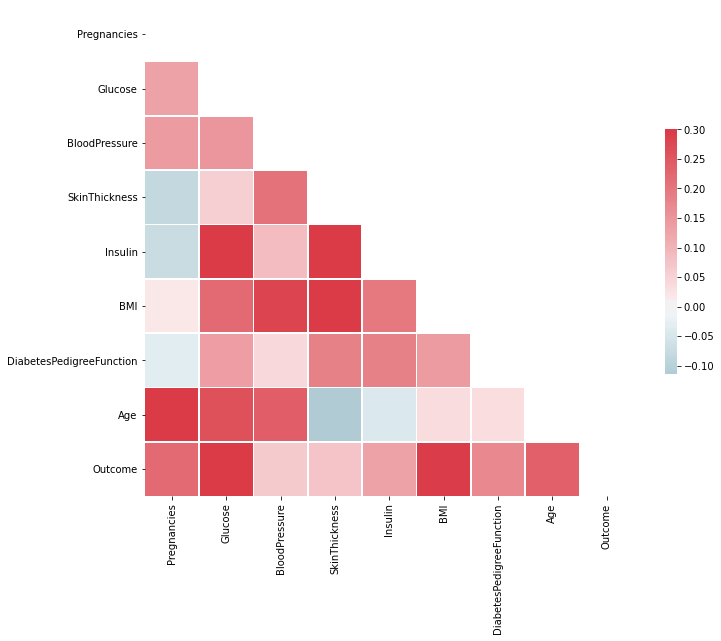

In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
#Função para comparar resultados - prof. Howard:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators = 100, random_state= 0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    
    # Iuri - Score pode ser negativo, com valor máximo de 1.0
    # Valores negativos indicam modelo ruim:
    print("Score: ", model.score(X_valid, y_valid))
    
    return mean_absolute_error(y_valid, preds) # Quanto menor, melhor!

In [22]:
#Apenas conferências:

print('Size: ', df.size, '\n')
print('Shape: ', df.shape, '\n')
df.info()
df.dtypes

Size:  4984 

Shape:  (712, 7) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   Fare         712 non-null    float64
 6   Embarked     712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
dtype: object

In [23]:
#Colunas que são objetos:
df.dtypes == 'object'

PassengerId    False
Survived       False
Pclass         False
Sex             True
Age            False
Fare           False
Embarked        True
dtype: bool

In [24]:
#Split arrays or matrices into random train and test subsets
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

import numpy as np
from sklearn.model_selection import train_test_split

# A variável X conterá a coluna Survived, e y terá o DataFrame menos a coluna Survived:
X = df.drop(['Survived'], axis=1)
y = df.Survived # Target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, test_size=0.5, random_state=0)

In [26]:
print('X_train: ', X_train, '\n===============\nX_test: ', X_test, '\n===============\ny_train: ', y_train, '\n===============\ny_test: ', y_test)

X_train:       PassengerId  Pclass     Sex   Age     Fare Embarked
74            75       3    male  32.0  56.4958        S
80            81       3    male  22.0   9.0000        S
572          573       1    male  36.0  26.3875        S
327          328       2  female  36.0  13.0000        S
666          667       2    male  25.0  13.0000        S
..           ...     ...     ...   ...      ...      ...
885          886       3  female  39.0  29.1250        Q
239          240       2    male  33.0  12.2750        S
791          792       2    male  16.0  26.0000        S
705          706       2    male  39.0  26.0000        S
858          859       3  female  24.0  19.2583        C

[356 rows x 6 columns] 
X_test:       PassengerId  Pclass     Sex    Age      Fare Embarked
423          424       3  female  28.00   14.4000        S
178          179       2    male  30.00   13.0000        S
305          306       1    male   0.92  151.5500        S
292          293       2    male  36

## Recuperando lista de variáveis categóricas:

In [27]:
lista = (df.dtypes == 'object')
object_cols = list(lista[lista].index)

print("Variáveis Categóricas:")
print(object_cols)

Variáveis Categóricas:
['Sex', 'Embarked']


## Label Encoder:

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex          712 non-null    object 
 3   Age          712 non-null    float64
 4   Fare         712 non-null    float64
 5   Embarked     712 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 38.9+ KB


In [40]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_test[col] = label_encoder.transform(X_test[col])
    print("col: ", col)

print("\nMAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_test, y_train, y_test))

col:  Sex
col:  Embarked

MAE from Approach 2 (Label Encoding):
Score:  0.3728756947162427
0.2790449438202247


## One Hot Encoder

In [41]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_test, y_train, y_test))

MAE from Approach 3 (One-Hot Encoding):
Score:  0.36587761252446194
0.279691011235955


In [42]:
# Carregar para os labels os dados do df
# Calcular a previsão pelo modelo (RandomForestRegressor)
# Apresento o resultado com o accuracy_score(y_train, y_test)

In [14]:
# Para o comando abaixo funcionar, as variáveis têm que ter o mesmo tamanho, que foi ajustado
# comando "X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, test_size=0.5, random_state=0)"

accuracy_score(y_train, y_test)

0.5224719101123596